In [33]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [34]:
df=pd.read_csv("C:\\Users\\ozlem\\OneDrive\\Masaüstü\\kodluyoruz\\2.hafta\\titanik\\titanik\\hmelq.csv")
data=df.dropna()
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [35]:
data["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

In [36]:
data.drop(['reason','job'],inplace = True,axis = 1)

C:\Users\ozlem\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [51]:
y=data["bad"]
X=data.drop(["bad"],axis=1)


In [38]:
loj=sm.Logit(y,X)#y leri x le modelleyeceğiz
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                  0.1227
Time:                        19:17:19   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

In [52]:
X_=X.drop(["mortdue","value","ninq"],axis=1)

In [53]:
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
print(loj_model.intercept_)#beta0
print(loj_model.coef_)

[-1.70541302]
[[-2.15724966e-05 -3.13104225e-02  5.70133837e-01  7.20738701e-01
  -6.86137414e-03 -3.69658767e-02  4.37205190e-02]]


In [55]:
y_pred=loj_model.predict(X_)

In [56]:
accuracy_score(y,y_pred) 

0.9207135777998018

In [57]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1840
           1       0.75      0.15      0.25       178

   micro avg       0.92      0.92      0.92      2018
   macro avg       0.84      0.57      0.61      2018
weighted avg       0.91      0.92      0.90      2018



In [58]:
loj_model.predict(X_)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.93791535, 0.06208465],
       [0.81229489, 0.18770511],
       [0.98697812, 0.01302188],
       [0.83476237, 0.16523763],
       [0.82000557, 0.17999443],
       [0.98423197, 0.01576803],
       [0.85334995, 0.14665005],
       [0.96480699, 0.03519301],
       [0.75102422, 0.24897578],
       [0.96060046, 0.03939954]])

In [59]:
logit_roc_auc=roc_auc_score(y,loj_model.predict(X_))
logit_roc_auc

0.5733970444553004

In [60]:
fpr,tpr,thresholds=roc_curve(y,loj_model.predict_proba(X_)[:,1])
print(fpr[0:10])
print(tpr[0:10])
print(thresholds[0:10])

[0.         0.         0.         0.00108696 0.00108696 0.00163043
 0.00163043 0.00326087 0.00326087 0.00434783]
[0.         0.00561798 0.09550562 0.09550562 0.11797753 0.11797753
 0.12921348 0.12921348 0.13483146 0.13483146]
[1.99359308 0.99359308 0.78450679 0.74083947 0.68589847 0.65698617
 0.65315655 0.61004577 0.60089134 0.58478392]


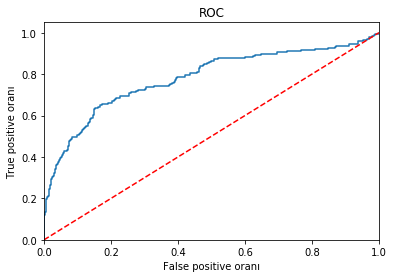

In [61]:
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive oranı")
plt.ylabel("True positive oranı")
plt.title("ROC")
plt.show()